In [2]:
import math
import numpy as np

from IPython.display import Audio
from scipy.io import wavfile
import scipy
import random

In [3]:
def ofdm_modulate(symbols):
    
    wav = []

    # Get OFDM parameters
    N = 17
    SPS = 40
    fft_symbols = [0] * N

    wav += [0] * 1234

    prev_symbols = [0] * 8

    for symbol in symbols:
        # 8th bit is parity
        parity = 0
        for i in range(7):
            parity ^= (symbol >> i) & 1


        for i in range(8):
            bit = (symbol >> i) & 1
            if i == 7:
                bit = parity
            cur_bit = bit ^ prev_symbols[i]
            prev_symbols[i] = bit
            fft_symbols[i+4] = cur_bit * 2 - 1
        

        ofdm = np.fft.irfft(fft_symbols)
        
        # Cyclic prefix
        ofdm = np.concatenate([ofdm[-8:], ofdm])
        
        wav.extend(ofdm)
    
    wav += [0] * 4321
    
    wav = np.array(wav)
    wav /= 4
    wav += 0.001 * np.random.randn(len(wav))

    return wav

In [4]:
text = """
OFDM, or Orthogonal Frequency-Division Multiplexing, is a method of digital signal modulation where a single data stream is divided across multiple closely spaced frequencies. This technique is designed to maximize the efficiency of data transmission over a radio wave or other communication mediums. It's especially effective in environments susceptible to interference and signal fading.
grey{0FDM_Modulat10n_M4g1c_4h398trh38rh9438}
Here's how OFDM works:
grey{0FDM_Modulat10n_M4g1c_4h398trh38rh9438}
1. **Division of Spectrum:** OFDM works by dividing the spectrum into many closely spaced channels or subcarriers. Each subcarrier is modulated with a conventional modulation scheme, such as Quadrature Amplitude Modulation (QAM) or Phase Shift Keying (PSK).
grey{0FDM_Modulat10n_M4g1c_4h398trh38rh9438}
2. **Orthogonality:** The subcarriers are mathematically orthogonal to each other, meaning their cross-talk is minimized, which allows them to be packed closely together without interference. This orthogonality ensures that the demodulators can pick out their respective signals independently.
grey{0FDM_Modulat10n_M4g1c_4h398trh38rh9438}
3. **Efficient Data Handling:** By spreading the data over multiple subcarriers, OFDM can reduce the impact of channel impairments like multipath fading and interference. This is because the high data rate stream is broken down into multiple slower streams, which are more robust against such issues.
grey{0FDM_Modulat10n_M4g1c_4h398trh38rh9438}
4. **Use of Guard Intervals:** OFDM also employs guard intervals, which include cyclic prefixes to each symbol to combat time dispersion caused by multipath propagation. This helps in maintaining the integrity of the data transmitted.
grey{0FDM_Modulat10n_M4g1c_4h398trh38rh9438}
OFDM is widely used in various communication systems, including broadband Internet (DSL), wireless networks (Wi-Fi, LTE, 5G), digital television and radio broadcasting (DAB, DVB), and more. Its ability to handle severe channel conditions while providing high data rate and spectral efficiency makes it a popular choice in modern communication technologies.
"""

wav = ofdm_modulate([ord(c) for c in text])
wavfile.write('ofdm.wav', 12000, wav)
print(len(wav))
Audio('ofdm.wav')

90715


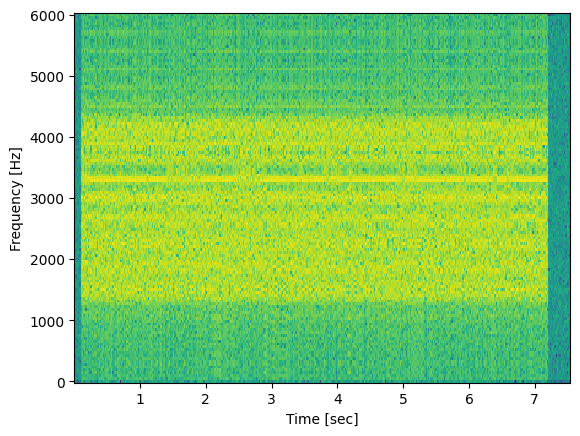

In [5]:
# Spectrogram of test.wav
import matplotlib.pyplot as plt
from scipy import signal

sample_rate, samples = wavfile.read('ofdm.wav')
f, t, Sxx = signal.spectrogram(samples, sample_rate)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()